### Installing ucimlrep

In [1]:
#pip install ucimlrepo

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import os
import joblib

C:\Users\nikde\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Fetching and Understanding the Mushroom dataset from the UCI Repository

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
features = mushroom.data.features 
targets = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

#storing the variables data to attributes
attributes = mushroom.variables 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

#### Additional Variable Information
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [4]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/mushroomclassification/data/rawdata", "features_data.csv")

# Save the features dataframe as a CSV file
features.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [5]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/mushroomclassification/data/rawdata", "targets_data.csv")

# Save the targets dataframe as a CSV file
targets.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [6]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/mushroomclassification/data/rawdata", "README.csv")

# Save the attributes dataframe as a CSV file
attributes.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [7]:
# Looking at the first 5 rows of the features
features.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [8]:
# Checking unique values of the column 'veil-type'
features['veil-type'].unique()

array(['p'], dtype=object)

Since veil-type has only one value, we can remove this column later.

In [9]:
# Checking the first 5 rows of the targets
targets.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [10]:
# Exploring the unique values of the target variable
targets['poisonous'].unique()

array(['p', 'e'], dtype=object)

In [11]:
# Extracting comprehensive info from the dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

### Data Preprocessing and Feature Engineering

In [12]:
# Merging the features with the targets dataset

In [13]:
df = features.join(targets)

In [14]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [15]:
# Checking the value distribution in the target variable (poisonous)
df['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

The value counts show that the dataset is well balanced.

#### Transforming the target variable into a binary variable showing 0 if edible and 1 if poisonous

In [16]:
df['poisonous'] = df['poisonous'].apply(lambda x : 0 if x == 'e' else 1)

In [17]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,0
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,0
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,0
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,1


### Performing Explorartory Data Analysis

In [18]:
# Define a folder to save visualizations
visuals_folder = "C:/Users/nikde/Documents/UpGrad/mushroomclassification/visuals"

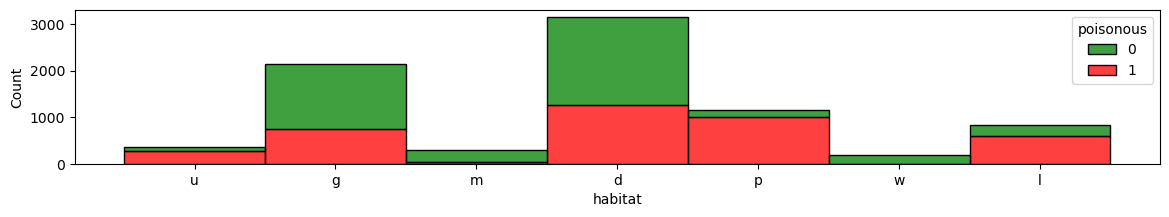

In [19]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='habitat', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically

plt.savefig(os.path.join(visuals_folder, "habitat_hist.png"))
plt.show()

Mushrooms which grow in habitats urban, paths and leaves are ususally more likely to be poisonous than those that grow in grasses and woods. Whereas mushrooms that grow in meadows and waste are more likely to be edible.

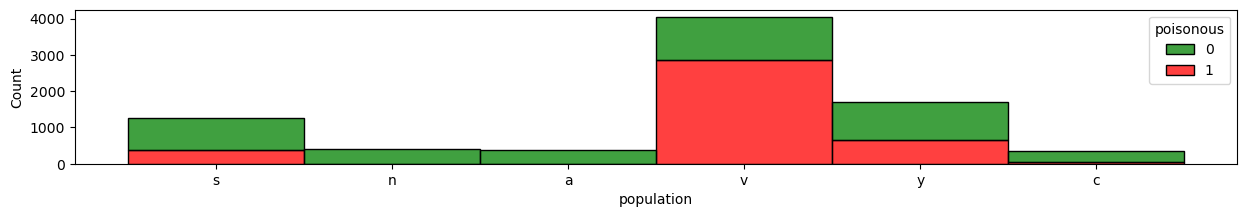

In [20]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='population', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "population_hist.png"))
plt.show()

Mushrooms that are grow in several population are usually more likely to be poisonous than other ranges.

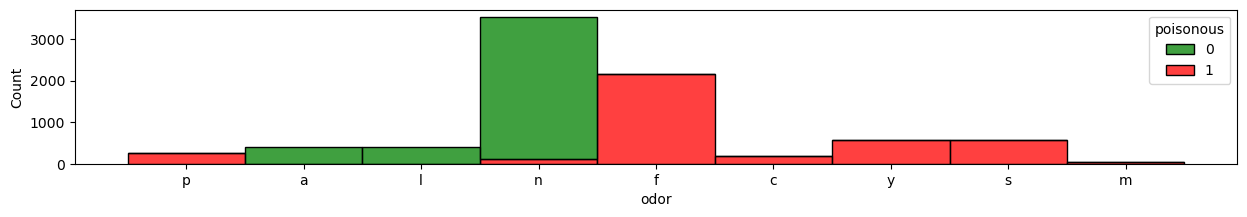

In [21]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='odor', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "odor_hist.png"))
plt.show()

Mushrooms that don't produce an odor or have an odor of almond or anise are usually edible.  

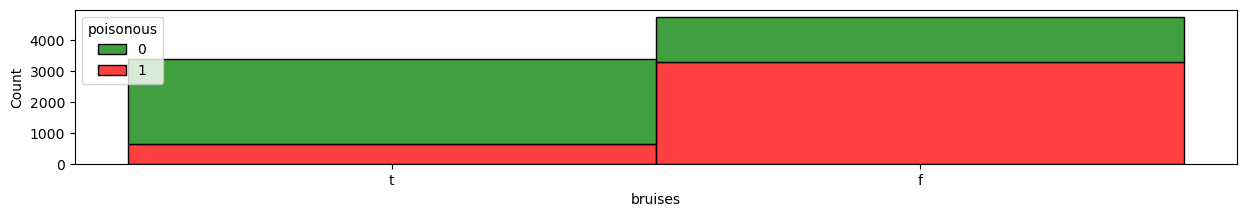

In [22]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='bruises', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "bruises_hist.png"))
plt.show()

Mushrooms that have bruises are more likely to be poisonous.

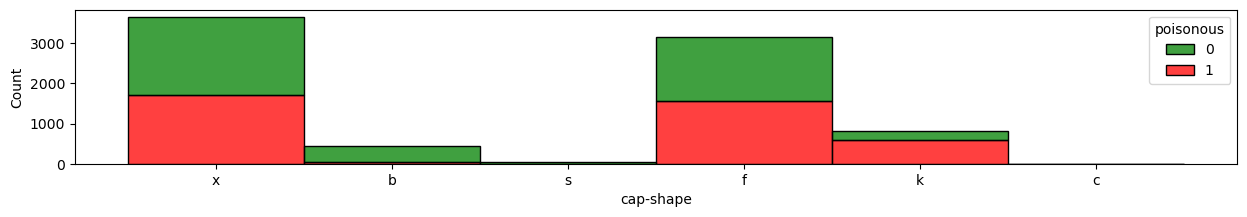

In [23]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='cap-shape', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "cap-shape_hist.png"))
plt.show()

Mushrooms that have a bell shaped cap are more likely to be edible whereas mushrooms with knobbed cap shape are more likely 
to be poisonous. However mushrooms with other cap shapes may or may not be poisonous.

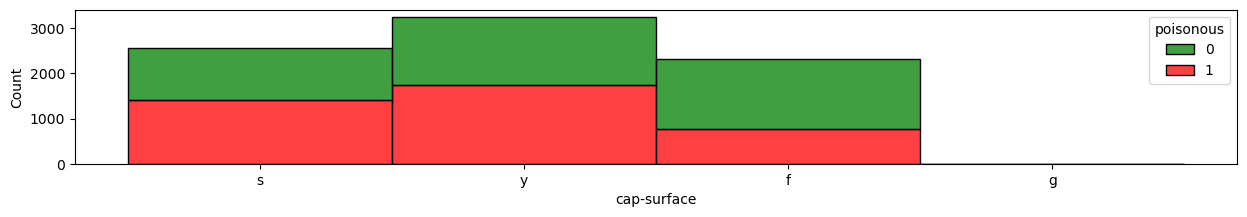

In [24]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='cap-surface', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "cap-surface_hist.png"))
plt.show()

Mushrooms that have a smooth and scaly cap surface are more likely to be poisonous whereas those with a fibrous surface are edible.

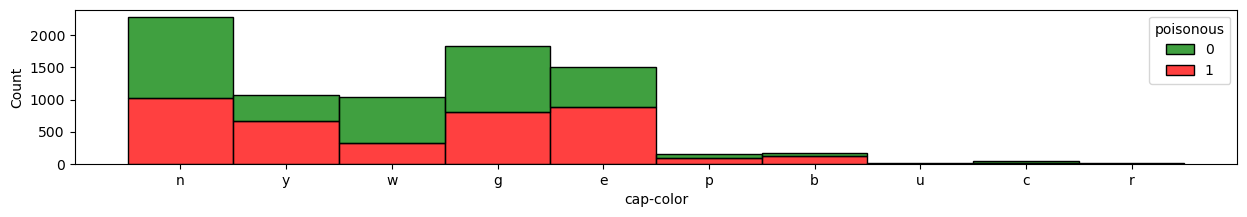

In [25]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='cap-color', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "cap-color_hist.png"))
plt.show()

Mushrooms with a white cap color are more likely to be edible than those with other cap colors.

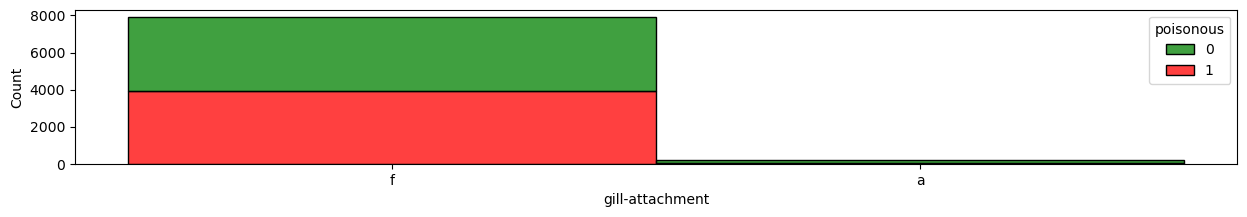

In [26]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='gill-attachment', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "gill-attachment_hist.png"))
plt.show()

Gill Attachment does not help to determine if a mushroom is poisonous or not. Hence we can remove this feature.

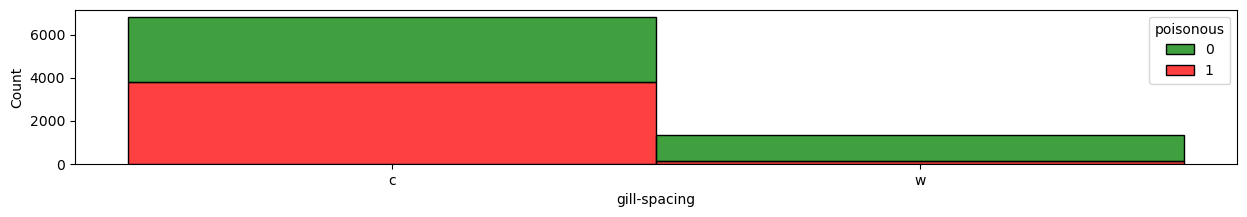

In [27]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='gill-spacing', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "gill-spacing_hist.png"))
plt.show()

Mushrooms with a crowded gill spacing are more likely to be edible than those with close and distant gill spacing.

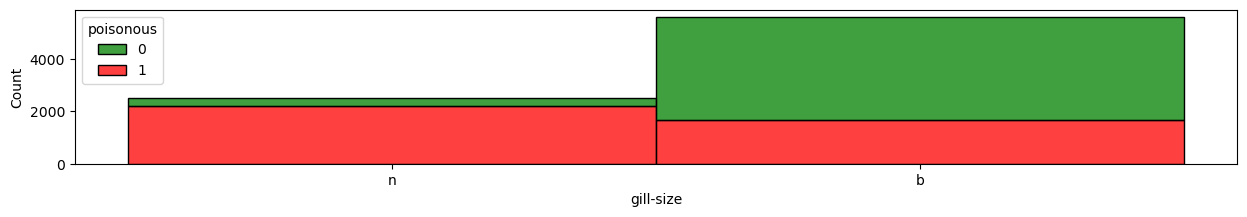

In [28]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='gill-size', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "gill-size_hist.png"))
plt.show()

Mushroooms with a broad gill size are more likely to be edible than those with a narrow gill size.

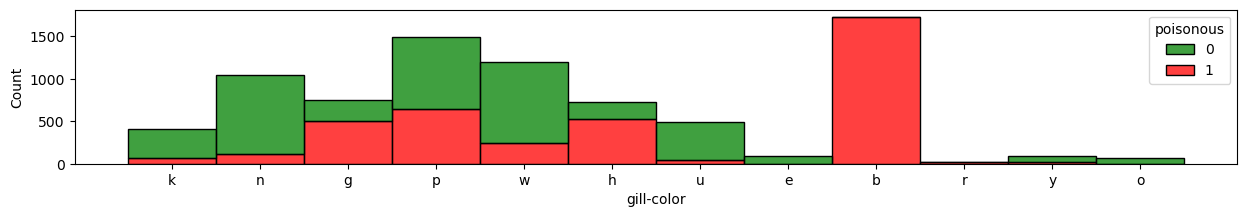

In [29]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='gill-color', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "gill-color_hist.png"))
plt.show()

Mushrooms with a gill color of buff, chocolate, gray are more likely to be poisonous and those having a color of pink may or may not be poisonous. However, those having other gill colors are more likely to be edible.

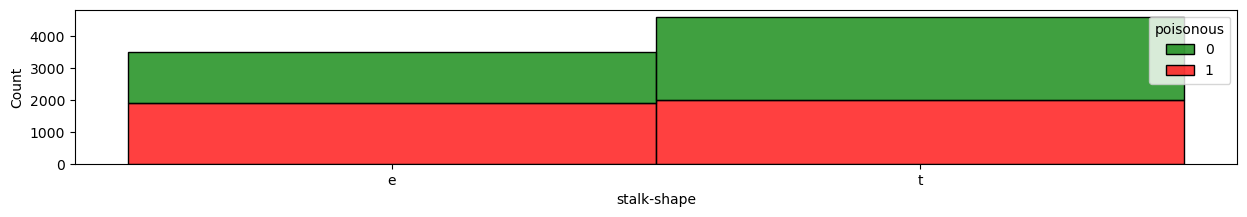

In [30]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='stalk-shape', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "stalk-shape_hist.png"))
plt.show()

Stalk shape doesn't help to determine if a mushroom is edible or not.

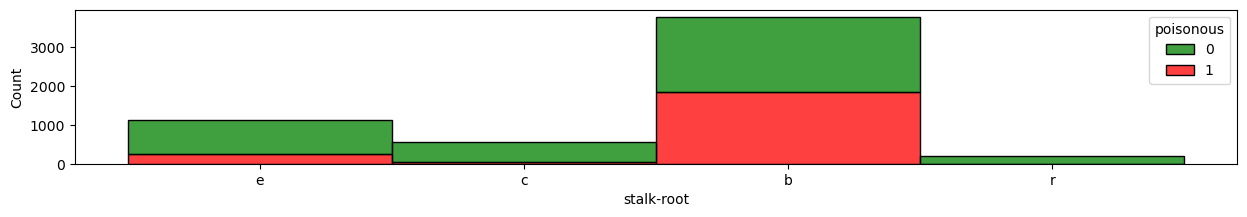

In [31]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='stalk-root', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "stalk-root_hist.png"))
plt.show()

Mushrooms with a bulbous stalk root are more likely to be poisonous.

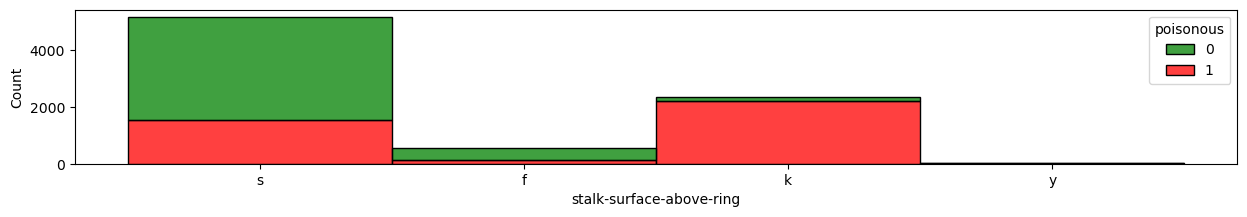

In [32]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='stalk-surface-above-ring', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "stalk-surface-above-ring_hist.png"))
plt.show()

Mushrooms that have a silky stalk surface both below and above the ring are more likely to be poisonous. We can remove one of these features as they are similar.

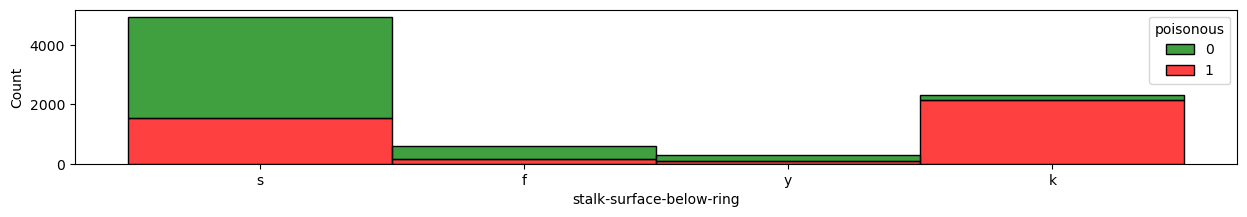

In [33]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='stalk-surface-below-ring', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "stalk-surface-below-ring_hist.png"))
plt.show()

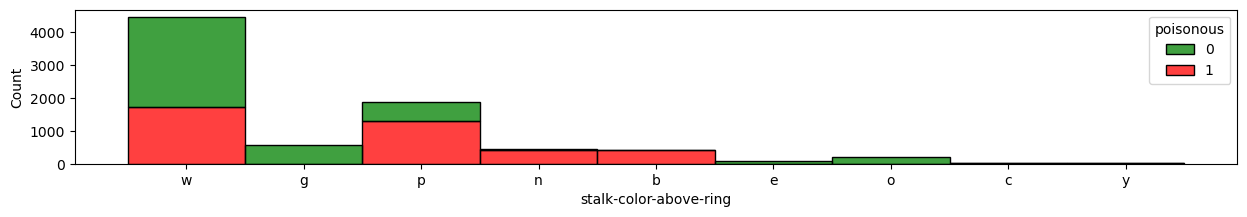

In [34]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='stalk-color-above-ring', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "stalk-color-above-ring_hist.png"))
plt.show()

Mushrooms having stalk colors Pink, buff and brown both above and below the stalk are more likely to be poisonous than other colors. We can remove one of these features as they are similar.

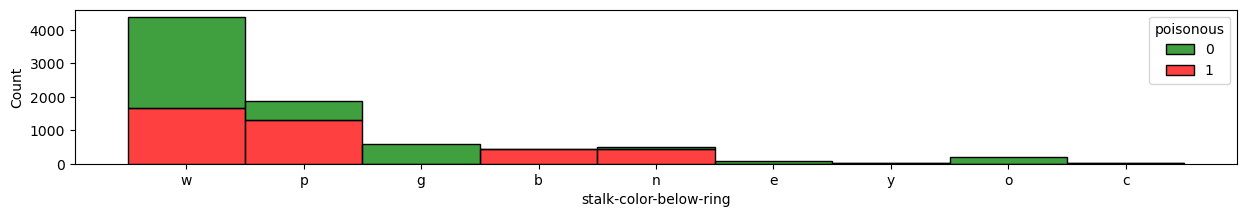

In [35]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='stalk-color-below-ring', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "stalk-color-below-ring_hist.png"))
plt.show()

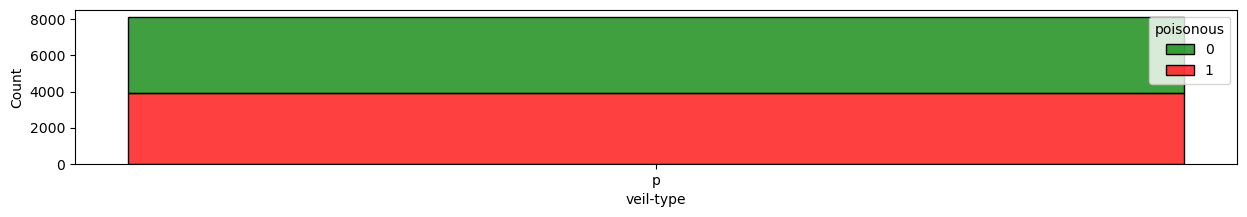

In [36]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='veil-type', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "veil-type_hist.png"))
plt.show()

Weil type and Weil colors don't help us to determine if a Mushroom is poisonous or not and hence can be removed.

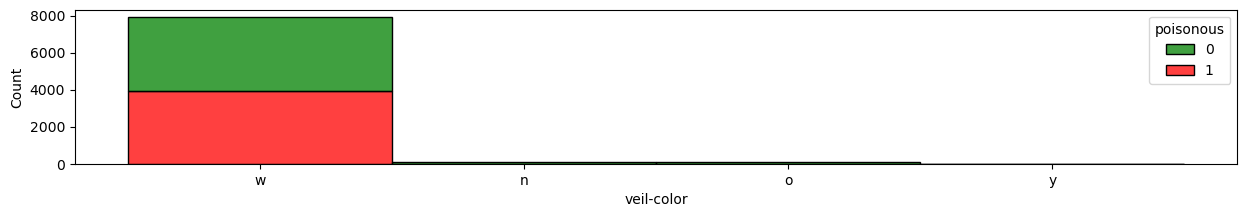

In [37]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='veil-color', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "veil-color_hist.png"))
plt.show()

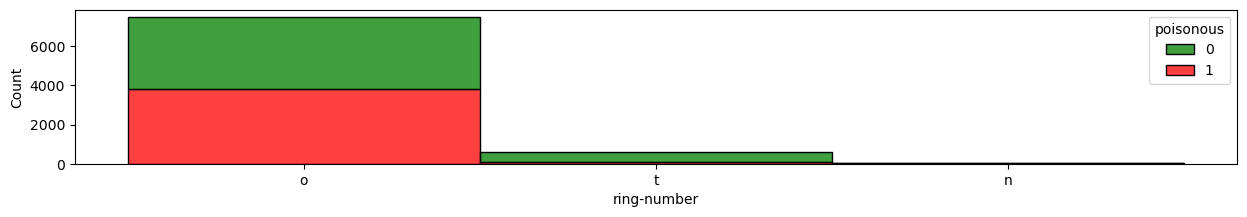

In [38]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='ring-number', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "ring-number_hist.png"))
plt.show()

Mushrooms with 2 rings are more likely to be edible than 1 or none.

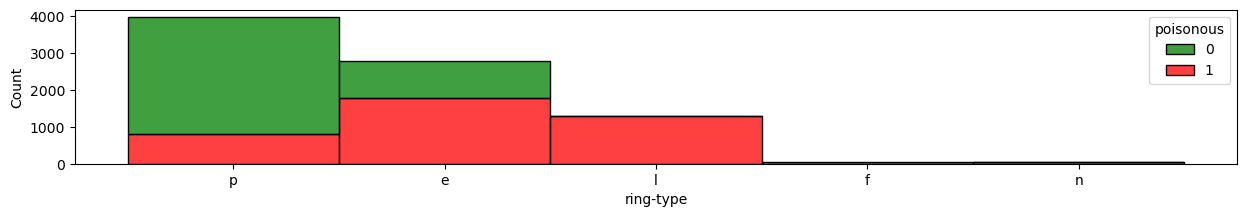

In [39]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='ring-type', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "ring-type_hist.png"))
plt.show()

Mushrooms having a pendant shaped ring are more likely to be edible than others.

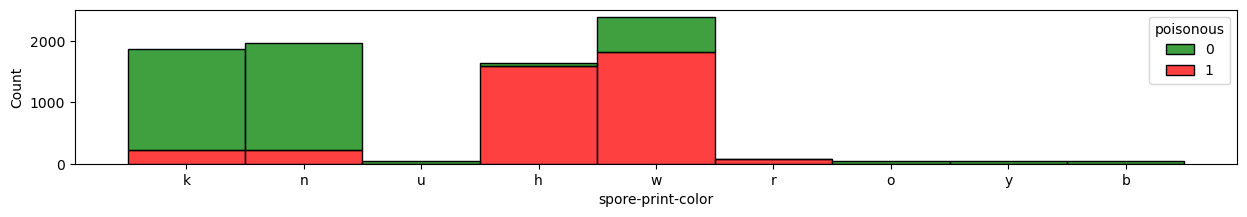

In [40]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x ='spore-print-color', hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "spore-print-color_hist.png"))
plt.show()

Mushrooms having black or brown colored spore print are more likely to be edible than others.

""" for col in df.columns:

    plt.figure(figsize=(15,2))
    sns.histplot(data=df, x = col, hue='poisonous', palette={0: 'green', 1: 'red'}, multiple='stack')
    plt.show()
    
"""      

I could have used the above commented loop to produce these visualizations but it wouldn't have been possible to comment on each visual.

### Data Cleaning (handling null values)

In [41]:
# Checking for null values
df.isna().sum()/len(df) * 100

cap-shape                    0.000000
cap-surface                  0.000000
cap-color                    0.000000
bruises                      0.000000
odor                         0.000000
gill-attachment              0.000000
gill-spacing                 0.000000
gill-size                    0.000000
gill-color                   0.000000
stalk-shape                  0.000000
stalk-root                  30.526834
stalk-surface-above-ring     0.000000
stalk-surface-below-ring     0.000000
stalk-color-above-ring       0.000000
stalk-color-below-ring       0.000000
veil-type                    0.000000
veil-color                   0.000000
ring-number                  0.000000
ring-type                    0.000000
spore-print-color            0.000000
population                   0.000000
habitat                      0.000000
poisonous                    0.000000
dtype: float64

We can see that 30% of the values in the stalk-root column are NaN and need to be taken care of.

#### Imputing the null values of stalk-root with it's mode 

In [42]:
df['stalk-root'] = df['stalk-root'].fillna(df['stalk-root'].mode()[0])

In [43]:
df.isna().sum()/len(df) * 100

cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
poisonous                   0.0
dtype: float64

Now we can see that there are no NaN values

In [44]:
# Looking at the stats of the target variable
df.describe()

,poisonous
count,8124.000000
mean,0.482029
std,0.499708
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [45]:
# Creating a copy of df for comparison purposes
df_copy = df.copy()

In [46]:
# Verifying the copy of df
df_copy.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0


### Encoding and Scaling the dataset (further Feature Engineering)

In [47]:
# Separating the numerical and categorical columns

def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64' or dataset[i].dtype == 'int8':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


In [48]:
numerical, categorical = data_type(df)

In [49]:
numerical

['poisonous']

In [50]:
categorical

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

#### Encoding the categorical columns

In [51]:
from sklearn.preprocessing import StandardScaler

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes #This returns the underlying integer codes for the categories in a categorical column. Each unique category is assigned an integer, starting from 0.
    return dataset

dataset = encoding(df, categorical)

In [52]:
# checking the dataset
dataset

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


In [53]:
# calling the data_type function again to update the numerical & categorical lists after encoding
numerical, categorical = data_type(dataset)

In [54]:
numerical

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat',
 'poisonous']

In [55]:
categorical

[]

#### Identifying the binary columns and ignoring them from scaling

In [56]:
def binary_columns(dataset):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

In [57]:
binary_cols

['poisonous']

In [58]:
numerical

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

#### Scaling the numerical features

In [59]:
def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset


In [60]:
# Calling the feature_scaling function and re-assigning the results to dataset
dataset = feature_scaling(dataset, numerical)

In [61]:
# Checking the dataset again
dataset.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
8119,-0.216992,0.140128,-0.19825,-0.84323,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.28571,0
8120,1.029712,0.140128,-0.19825,-0.84323,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.28571,0
8121,-0.840343,0.140128,-0.19825,-0.84323,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.28571,0
8122,-0.216992,0.953270,-0.19825,-0.84323,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.28571,1
8123,1.029712,0.140128,-0.19825,-0.84323,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,0.169254,-2.111827,0.28571,0


In [62]:
dataset['veil-type'].unique()

array([0.])

In [63]:
# dropping the veil-type column as it has the same value for all rows
dataset = dataset.drop('veil-type', axis = 1)

In [64]:
# creating the co-relation matrix of the dataset using corr()
cormatrix = dataset.corr()

In [65]:
# checking the co-relation matrix
cormatrix

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


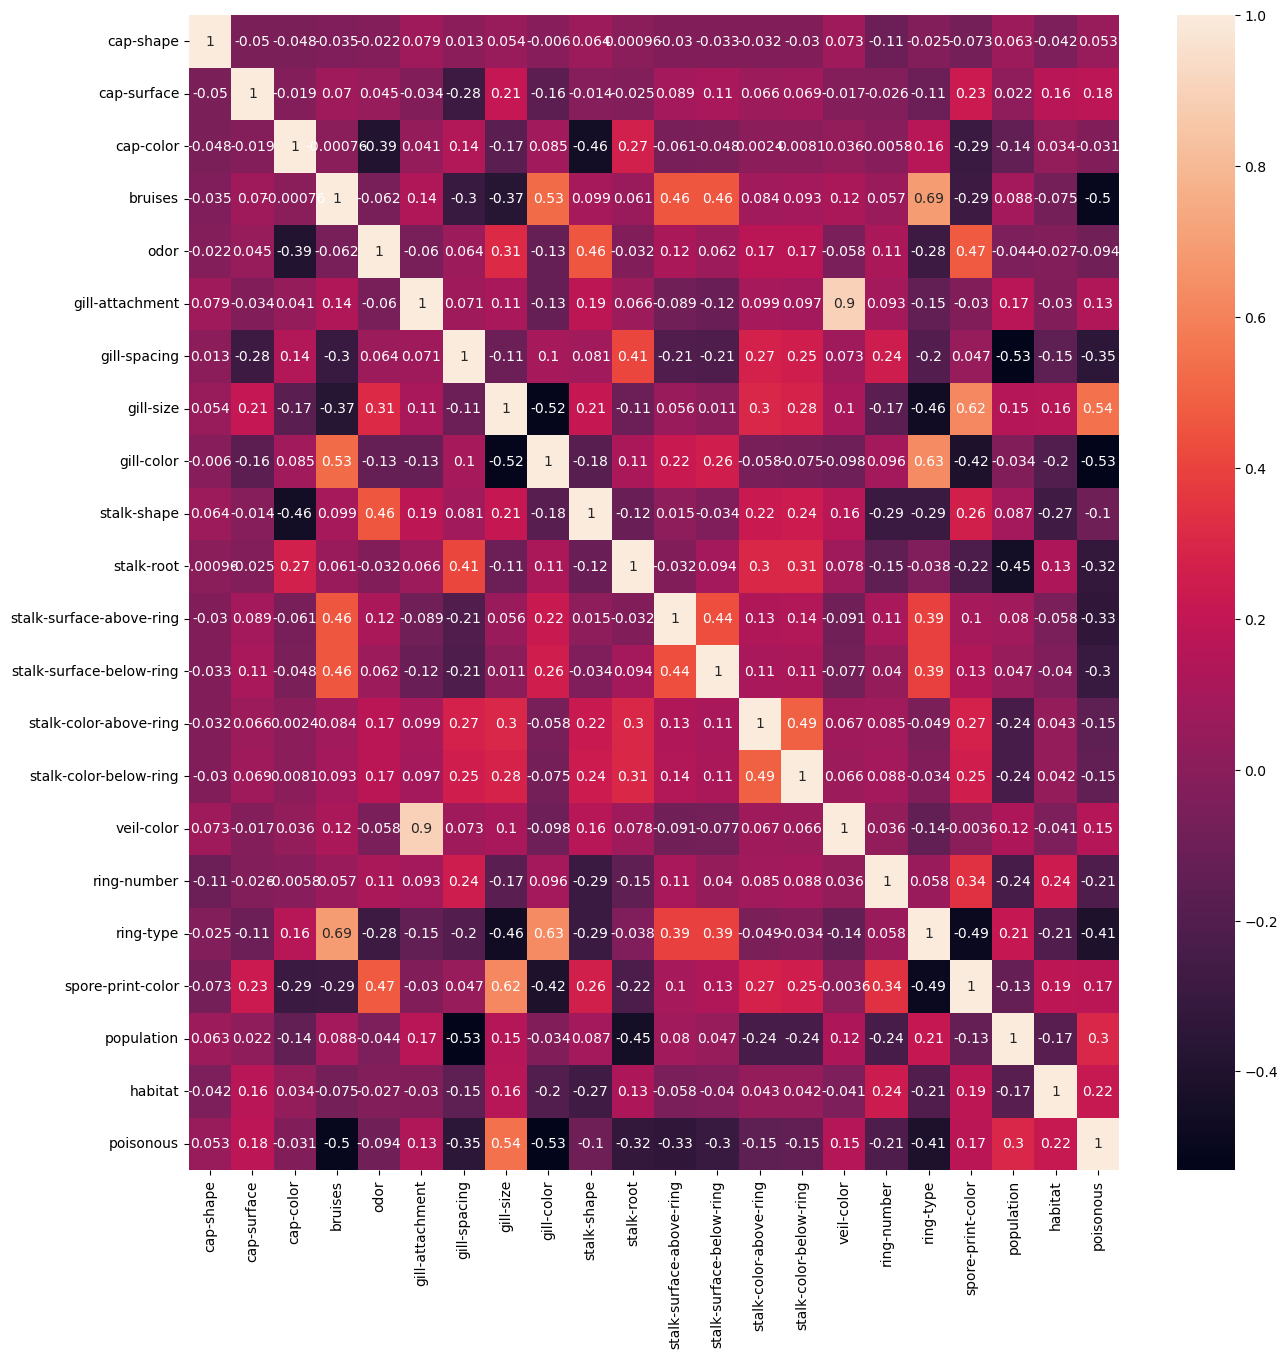

In [66]:
# Plotting a Heatmap of the co-relation matrix to check for features with high co-relation
plt.figure(figsize = (15,15))
sns.heatmap(cormatrix, annot = True)

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Initial_Corelation_matrix.png"))
plt.show()

Since veil-color and gill-attachment have a high positive co-relation we can remove one of them.

In [67]:
# dropping veil-color 
dataset = dataset.drop('veil-color', axis = 1)

In [68]:
# checking the dataset after dropping veil-color
dataset.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,-0.256132,0.948081,-0.670195,-0.514389,2.030028,1
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,-0.256132,0.948081,-0.250471,-1.313108,-0.295730,0
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,-0.256132,0.948081,-0.250471,-1.313108,0.867149,0
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,-0.256132,0.948081,-0.670195,-0.514389,2.030028,1
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730,0


#### Storing the processed data to a csv file in the project's data folder

In [69]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/mushroomclassification/data/processeddata", "processed_data.csv")

# Save the datasets dataframe as a CSV file
dataset.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

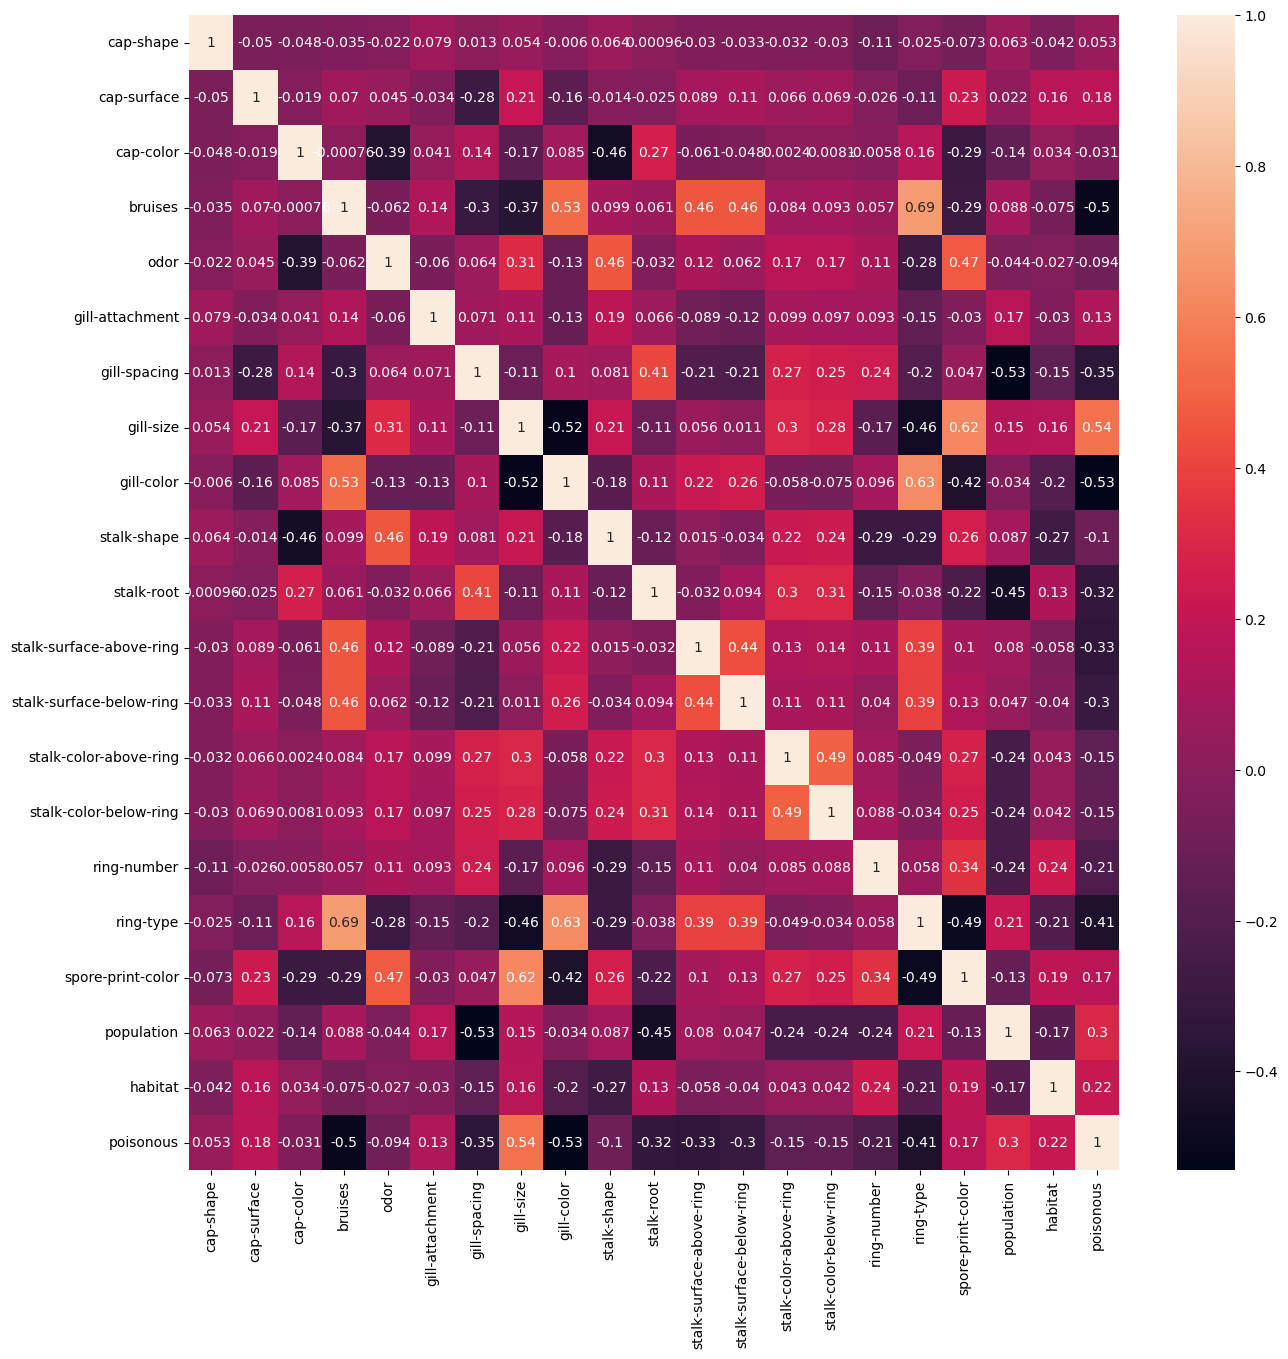

In [70]:
# re-plotting the heatmap to check the co-relations
plt.figure(figsize = (15,15))
sns.heatmap(dataset.corr(), annot = True)

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Final_Corelation_Matrix.png"))
plt.show()

Now none of the columns have a high positive or negative co-realtion with each other and need to be used

### Performing Train-Test split on the dataset

In [71]:
# extracting the independent variables into x
x = dataset.iloc[:,:20].values

In [72]:
x

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [73]:
# extracting the dependent variable into y
y = dataset.iloc[:,[-1]].values

In [74]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [75]:
# Using the train_test_split method to create train test splits on x & y 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 45)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (6499, 20)
y_train (6499, 1)
X_test (1625, 20)
y_test (1625, 1)


In [76]:
# checking the splits
X_train, X_test, y_train, y_test

(array([[-0.8403434 ,  0.95327039, -0.59107461, ..., -1.08991911,
          1.08304882, -0.8771691 ],
        [-0.8403434 ,  0.14012794, -0.98389939, ...,  1.42842641,
          0.28432981,  1.44858865],
        [-0.8403434 , -1.48615695, -0.59107461, ..., -1.08991911,
          1.08304882,  1.44858865],
        ...,
        [-0.8403434 ,  0.14012794,  1.37304929, ..., -1.08991911,
          0.28432981,  2.03002809],
        [ 1.02971224,  0.14012794, -0.19824983, ..., -1.50964337,
          0.28432981,  0.28570978],
        [ 1.02971224,  0.14012794, -0.98389939, ...,  1.42842641,
          0.28432981,  0.28570978]]),
 array([[-0.21699152, -1.48615695, -0.59107461, ...,  1.42842641,
         -1.31310821, -0.29572966],
        [-0.8403434 ,  0.14012794, -0.19824983, ..., -0.67019486,
         -0.5143892 , -0.29572966],
        [-0.8403434 , -1.48615695, -0.59107461, ..., -1.08991911,
          1.08304882, -0.29572966],
        ...,
        [-0.8403434 ,  0.14012794, -0.19824983, ...,  

### Model Training and Evaluation

In [77]:
# importing Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression

In [78]:
#Applying the Logistic Regression on the training dataset

logmodel_ini = LogisticRegression()
logmodel_ini.fit(X_train,y_train)

LogisticRegression()

In [79]:
#Running the model on the test dataset
y_pred_ini = logmodel_ini.predict(X_test)

In [80]:
#checking predictions obtained
y_pred_ini

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [81]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, log_loss,roc_curve, auc,RocCurveDisplay, PrecisionRecallDisplay,ConfusionMatrixDisplay

#### Accuracy

In [82]:
#Using accuracy_score() we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.9556923076923077

#### Confusion Matrix

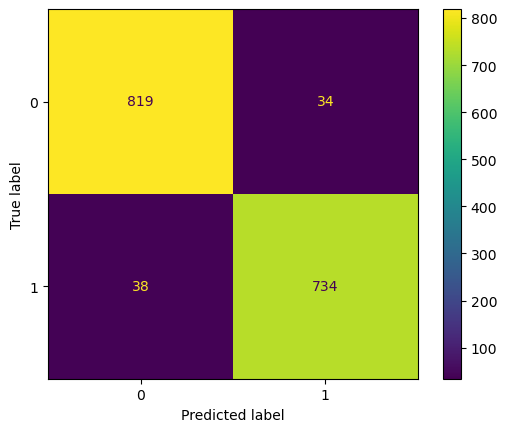

In [83]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_ini, labels=logmodel_ini.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel_ini.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Confusion_Matrix.png"))
plt.show()

#### ROC Curve

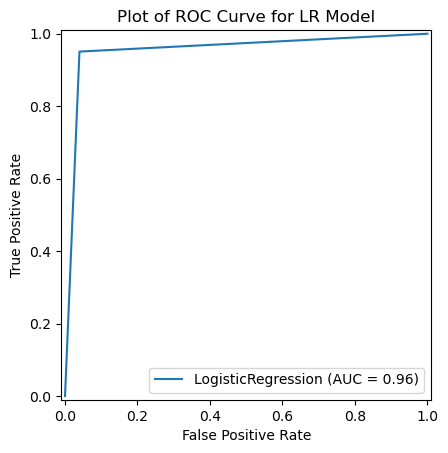

In [84]:
# Assuming y_true are the true binary labels
# and y_scores are the probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ini)
roc_auc = auc(fpr, tpr)

# Create RocCurveDisplay
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LogisticRegression')

# Plot the ROC curve
display.plot()
plt.title("Plot of ROC Curve for LR Model")

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Plot of ROC Curve for LR Model.png"))
plt.show()

#### F1 Score

In [85]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,logmodel_ini.predict(X_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.96      0.96      0.96       853
 Positive(1)       0.96      0.95      0.95       772

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



#### Log Loss

In [86]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_test,logmodel_ini.predict(X_test))

1.5970111040101138

In [87]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = logmodel_ini.predict(X_train)

In [88]:
#Checking the accuracy of training dataset
accuracy_score(y_train,y_pred_train)

0.9639944606862594

In [89]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.9556923076923077

### Applying K-Fold Cross Validation to perform Hyperparameter tuning to find the best value of C (C = 1/Lambda)

The best value of C is: 10


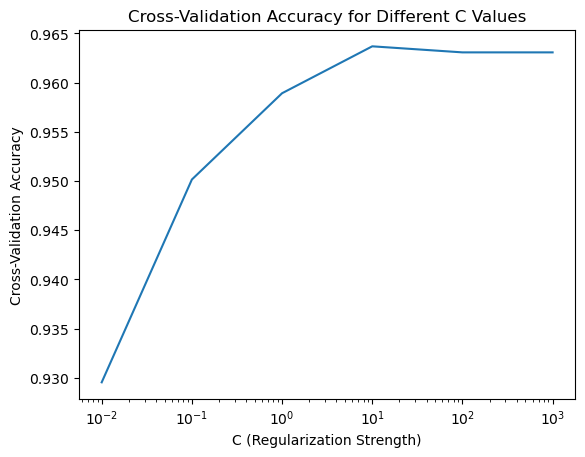

In [90]:
#Using K-fold cross validation technique we will find the best value of C
C = [0.01,0.1,1,10,100,1000]
from sklearn.model_selection import cross_val_score
cv_score = []

for c in C:
    logmodel = LogisticRegression(C=c)
    scores = cross_val_score(logmodel, X_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())

    
# Find the best C value based on maximum cross-validation accuracy
best_index = np.argmax(cv_score)
best_C = C[best_index]

print(f"The best value of C is: {best_C}")

cv_score
plt.plot(C, cv_score)
plt.xscale('log')  # Use log scale for C values to make the plot more readable
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different C Values')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Cross-Validation Accuracy for Different C Values.png"))
plt.show()

### Using different regularization models to find the best performing model

#### L2 (Ridge) Regulariaztion Model

In [91]:
#Applying the Logistic Regression on the training dataset

logmodel_ridge = LogisticRegression(C=10,penalty='l2',solver='liblinear')
logmodel_ridge.fit(X_train,y_train)

LogisticRegression(C=10, solver='liblinear')

In [92]:
logmodel_ridge.coef_

array([[ 0.01470367,  0.55244948, -0.15139874,  0.1615306 , -1.76422298,
         0.81542909, -6.66911657,  7.89384695, -0.69623744, -0.57536328,
        -5.88402383, -5.52839555,  0.25744446, -0.37616469, -0.06599657,
         0.44465179,  4.76956859,  0.02215457, -1.93131248,  0.2736058 ]])

In [93]:
#Running the model on the test dataset
y_pred_ridge = logmodel_ridge.predict(X_test)

#### Accuracy

In [94]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ridge)

0.955076923076923

In [95]:
#Running the model on the training dataset
y_pred_train_ridge = logmodel_ridge.predict(X_train)

In [96]:
#Using accuracy_score() we are checking the accuracy on the training dataset
accuracy_score(y_train,y_pred_train_ridge)

0.9663025080781659

#### L1 (Lasso) Regularization Model

In [97]:
#Applying the Logistic Regression on the training dataset

logmodel_lasso = LogisticRegression(C=10,penalty='l1',solver='liblinear')
logmodel_lasso.fit(X_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [98]:
logmodel_lasso.coef_

array([[ 0.01735935,  0.54886226, -0.15528608,  0.19559154, -1.82885621,
         0.83824908, -6.92424065,  8.16137083, -0.70920378, -0.60583923,
        -6.1170649 , -5.66604172,  0.28752456, -0.39143424, -0.07392404,
         0.44382662,  4.95803305,  0.03740601, -1.99428854,  0.27881134]])

In [99]:
#Running the model on the test dataset
y_pred_lasso = logmodel_lasso.predict(X_test)

#### Accuracy

In [100]:
#Using accuracy_score() we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_lasso)

0.9556923076923077

In [101]:
#Running the model on the training dataset
y_pred_train_lasso = logmodel_lasso.predict(X_train)

In [102]:
#Using accuracy score we are checking the accuracy on the training dataset
accuracy_score(y_train,y_pred_train_lasso)

0.9663025080781659

#### Elastic Net (L1+L2) Regularization model

In [103]:
#Applying the Logistic Regression on the training dataset with Elastic net, we are adding l1_ratio = 0.5
#that means we are adding both L1 and L2.
#The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'.
#Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'.
#For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

logmodel_elasticnet = LogisticRegression(C=10,penalty='elasticnet',solver='saga',l1_ratio=0.5)
logmodel_elasticnet.fit(X_train,y_train)

LogisticRegression(C=10, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [104]:
logmodel_elasticnet.coef_

array([[ 0.01576572,  0.55024387, -0.15298562,  0.17780756, -1.79238987,
         0.8252498 , -6.78094064,  8.01034655, -0.70141638, -0.59182588,
        -5.98767044, -5.58241819,  0.26991651, -0.38307374, -0.06986196,
         0.44269334,  4.85000072,  0.02884772, -1.95710272,  0.27588048]])

In [105]:
#Running the model on the test dataset
y_pred_elasticnet = logmodel_elasticnet.predict(X_test)

#### Accuracy

In [106]:
#Using accuracy_score() we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_elasticnet)

0.955076923076923

In [107]:
#Running the model on the train dataset
y_pred_train_elasticnet = logmodel_elasticnet.predict(X_train)

In [108]:
#Using accuracy score we are checking the accuracy on the training dataset
accuracy_score(y_train,y_pred_train_elasticnet)

0.9663025080781659

In [109]:
# Define the folder where models will be saved
model_folder = "C:/Users/nikde/Documents/UpGrad/mushroomclassification/models"

In [110]:
# Save each model with a different name
joblib.dump(logmodel_ini, os.path.join(model_folder, "Initial_model.pkl"))
joblib.dump(logmodel_ridge, os.path.join(model_folder, "L2_Ridge_Regression_model.pkl"))
joblib.dump(logmodel_lasso, os.path.join(model_folder, "L1_Lasso_Regression_model.pkl"))
joblib.dump(logmodel_elasticnet, os.path.join(model_folder, "L1_L2_ElasticNet_model.pkl"))

print("All models saved successfully!")

All models saved successfully!


### Creating the score-card and defining a function to update it with important perfromance metrics

In [111]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = pd.concat([score_card,pd.DataFrame([{'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'AUC Score': roc_auc_score(y_test, y_pred),
                                    'f1 Score': f1_score(y_test, y_pred)}])],
                                    ignore_index = True)

#### Calling the update score card method using all models for comparing their results

In [112]:
update_score_card(y_test,y_pred_ini,'initial_model')

In [113]:
update_score_card(y_test,y_pred_ridge,'Ridge Regression - L2 Reg')

In [114]:
update_score_card(y_test,y_pred_lasso,'Lasso Regression - L1 Reg')

In [115]:
update_score_card(y_test,y_pred_elasticnet,'Elastic Net - L1 and L2')

In [116]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,initial_model,0.955692,0.955729,0.950777,0.955459,0.953247
1,Ridge Regression - L2 Reg,0.955077,0.954486,0.950777,0.954873,0.952628
2,Lasso Regression - L1 Reg,0.955692,0.954545,0.952073,0.955520,0.953307
3,Elastic Net - L1 and L2,0.955077,0.954486,0.950777,0.954873,0.952628


#### Insights:
    
##### Initial Model:

This model has the highest accuracy (0.955692) and a slightly better F1 score than the Ridge and Elastic Net models, 
indicating a good balance between precision and recall.

##### Ridge Regression (L2 Regularization):

The accuracy (0.955077) and F1 score (0.952628) are slightly lower compared to the initial model. Ridge regression is 
more robust to collinearity but may not offer significant improvements if the features are not heavily correlated.

##### Lasso Regression (L1 Regularization):

Lasso has the same accuracy as the initial model (0.955692) but with a slightly lower precision and slightly higher recall. 
Lasso can help reduce the number of features by shrinking coefficients of less important features to zero, 
but in this case, it doesn't lead to major performance differences.

##### Elastic Net (L1 + L2 Regularization):

The performance of the Elastic Net model is similar to Ridge (L2), with slightly lower accuracy and F1 score compared 
to the initial model. Elastic Net combines L1 and L2 regularization, so it strikes a balance between 
feature selection and regularization, but here it doesn’t seem to outperform the other models.

#### Observations:

Lasso (L1 regularization) has slightly better recall (0.952073), which suggests it's catching more true positives, 
making it potentially better if recall is critical in your task.

Ridge and Elastic Net models are very similar in performance, but they have marginally lower accuracy and F1 scores.

The Initial Model still has the highest accuracy and a balanced performance across all metrics.

#### Conclusion:

Given the small differences, if feature selection or reducing model complexity is important, 
it might be better to lean towards Lasso for its ability to zero out less important features. 

However, if overall performance (accuracy, F1) is the primary goal, the initial model is already performing the best.